In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans

In [2]:
zip_lon_lat = pd.read_csv('ny_zip-lon-lat.csv')
zip_lon_lat.head()

,zip_code,latitude,longitude
0,10001,40.750633,-73.997177
1,10002,40.715775,-73.986212
2,10003,40.731829,-73.989181
3,10004,40.688630,-74.018244
4,10005,40.706027,-74.008835


In [3]:
features = ["latitude","longitude"]
X = zip_lon_lat[features]
number_of_counties = 62

In [4]:
kmeans = KMeans( init="random", n_clusters=number_of_counties,random_state=0)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

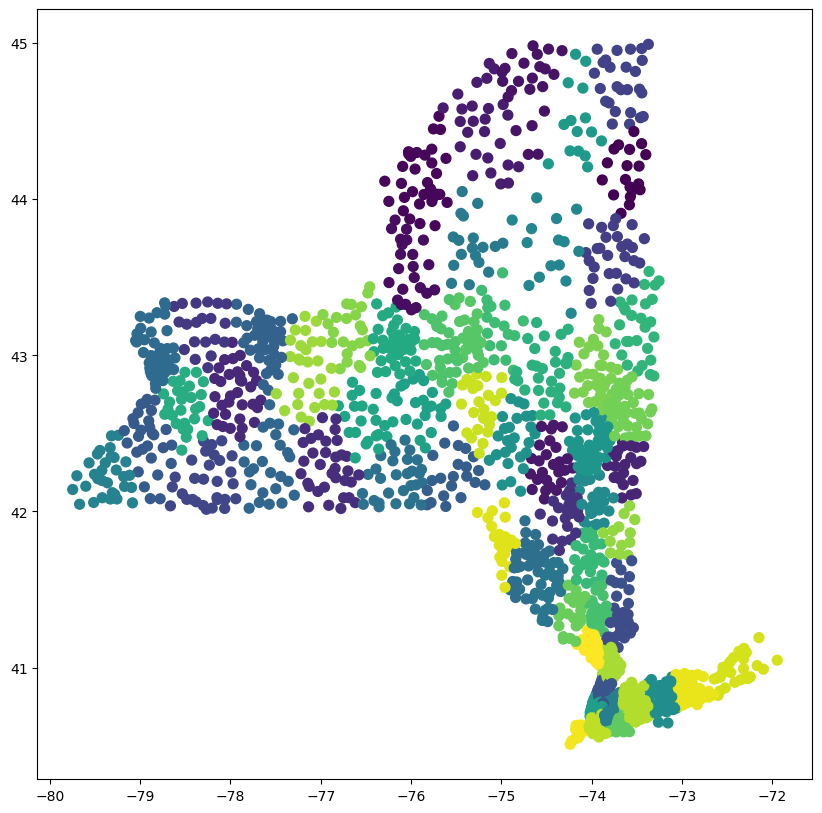

In [5]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.scatter(X["longitude"], X["latitude"], c=y_kmeans, s=50, cmap='viridis')

In [6]:
zip_lon_lat['county'] = y_kmeans.tolist()
zip_lon_lat.head()

,zip_code,latitude,longitude,county
0,10001,40.750633,-73.997177,34
1,10002,40.715775,-73.986212,34
2,10003,40.731829,-73.989181,34
3,10004,40.688630,-74.018244,34
4,10005,40.706027,-74.008835,34


In [7]:
zip_lon_lat.to_csv('county.csv')

In [8]:
zip_lon_lat.groupby(['county'])['county'].count()

county
0     19
1     33
2     23
3     23
4     26
      ..
57    27
58    22
59    34
60    13
61    22
Name: county, Length: 62, dtype: int64

In [9]:
outliers_df = pd.read_csv('outliers.csv')
outliers_df.drop(columns=["Unnamed: 0"],inplace=True)
#outliers_df.head()

In [10]:
merged_df = pd.merge(outliers_df, zip_lon_lat, how='inner', on="zip_code")
merged_df.tail()

,bed,bath,acre_lot,zip_code,house_size,prev_sold_date,price,latitude,longitude,county
12237,3.0,2.0,0.19,14219.0,1506.0,2019-04-26,189900.0,42.788675,-78.826431,21
12238,2.0,2.0,0.20,14219.0,1259.0,2018-12-13,224900.0,42.788675,-78.826431,21
12239,4.0,2.0,0.17,14219.0,1884.0,2016-06-15,175000.0,42.788675,-78.826431,21
12240,4.0,3.0,0.41,14219.0,2664.0,2018-08-24,289000.0,42.788675,-78.826431,21
12241,3.0,2.0,0.34,14219.0,1350.0,2020-06-08,194900.0,42.788675,-78.826431,21


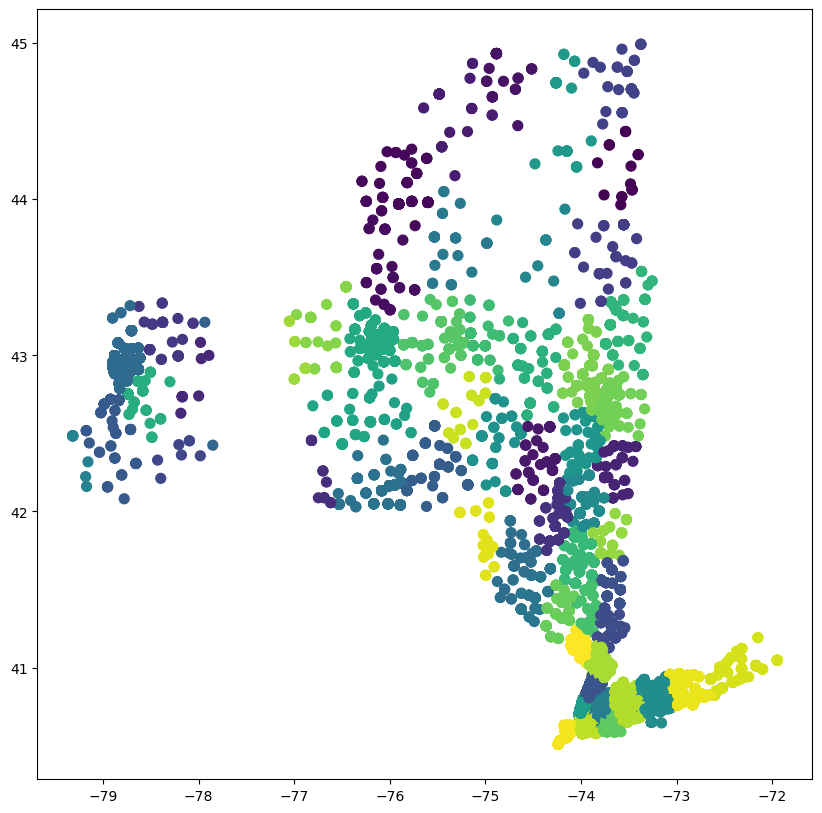

In [11]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.scatter(merged_df["longitude"],merged_df["latitude"], c=merged_df["county"], s=50, cmap='viridis')

In [12]:
outliers_df.groupby(["zip_code"])["zip_code"].count()

zip_code
10001.0    28
10002.0    26
10003.0    87
10004.0     6
10005.0    15
           ..
14861.0     2
14882.0     5
14886.0     4
14892.0     7
14901.0     1
Name: zip_code, Length: 1145, dtype: int64